<a href="https://colab.research.google.com/github/mathiaspetta/Trabajo_Practico_BigData/blob/main/Trabajo_Pr%C3%A1ctico_de_Big_Data_MathiasPetta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##TRABAJO PRACTICO BIG DATA

In [ ]:
#COMPONENTE 1

In [99]:
#Imports
!pip install config
!pip install stop_words
import pandas as pd
import tweepy
import re
from stop_words import get_stop_words
from config import *
from wordcloud import WordCloud
import datetime
from textblob import TextBlob
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [100]:
#Tokens Twitter Credenciales
TWITTER_CONSUMER_KEY = 'e27sd02R39EIsSHfrTUCiOwXT'
TWITTER_CONSUMER_SECRET = 'X0K7qJC7lZ9An1NXWJ3yYijOp4tAFPWcd3OjcBP15djPe9m5KZ'
TWITTER_ACCESS_TOKEN = '175984347-MCv5cbRKRBxXOFKDUfsQVtGhuPy42aRDn53UWP4L'
TWITTER_ACCESS_TOKEN_SECRET = 'XMEe25XGwoeozruLf9Y1zK5wYlTup9U0xLHLG4BT3JffE'

In [101]:
#Autenticar Tokens
auth = tweepy.OAuthHandler(TWITTER_CONSUMER_KEY, TWITTER_CONSUMER_SECRET)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_TOKEN_SECRET)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [102]:
#Establecer fecha
today = datetime.date.today()
yesterday= today - datetime.timedelta(days=1)

In [103]:
#Ingreso de Tweets
hashtag = input("Ingrese el hashtag de Twitter: ")
ttweets = int(input("Ingrese la cantidad de tweets: "))

Ingrese el hashtag de Twitter: Paraguay
Ingrese la cantidad de tweets: 100


In [104]:
#Texto-Autor-Timestamp-Favs-RTs
tweets = tweepy.Cursor(api.search, q=hashtag, lang='es').items(ttweets)
tweet_list = [[tweet.text, tweet.user.screen_name, tweet.created_at, tweet.retweet_count, tweet.favorite_count] for tweet in tweets]
tweet_list

[['El ex presidente de Paraguay Horacio Cartes dirige un grupo económico que lleva su apellido y que cuenta con más de… https://t.co/2XHlrDjxdI',
  'LabCronos',
  datetime.datetime(2022, 6, 15, 14, 36, 53),
  0,
  0],
 ['RT @aestigarribia: Alemania tiene altos impuestos para los empresarios y establecidos muchos derechos laborales para los trabajadores. Para…',
  'albertomedina71',
  datetime.datetime(2022, 6, 15, 14, 36, 51),
  18,
  0],
 ['RT @Estigarribiapy_: Un 15 de Junio de 2008, Paraguay bailó a la selección brasileña de Dunga por Eliminatorias \n\n https://t.co/aiApgWz0ea',
  'lopez_leolopez',
  datetime.datetime(2022, 6, 15, 14, 36, 44),
  37,
  0],
 ['#WayraStartups | @Joinnus alista su ingreso a México y busca cerrar una ronda de inversión este año⚡\n\nLa meta es te… https://t.co/DWu1xituqY',
  'wayrahispam',
  datetime.datetime(2022, 6, 15, 14, 36, 39),
  0,
  0],
 ['Paraguay recibe premio Forum por su apoyo y crecimiento en el turismo de reuniones - .::Agencia IP::.\n\nhtt

In [105]:
#Creacion del DataFrame
tweet_dataframe = pd.DataFrame(tweet_list)
tweet_dataframe.columns = [ "Tweet", "Autor", "Fecha", "Total Favs", "Total RTs"]
tweet_dataframe

Tweet            Autor  \
0   El ex presidente de Paraguay Horacio Cartes di...        LabCronos   
1   RT @aestigarribia: Alemania tiene altos impues...  albertomedina71   
2   RT @Estigarribiapy_: Un 15 de Junio de 2008, P...   lopez_leolopez   
3   #WayraStartups | @Joinnus alista su ingreso a ...      wayrahispam   
4   Paraguay recibe premio Forum por su apoyo y cr...      nyoticiaspy   
..                                                ...              ...   
95  RT @Julioac13: Paraguay había advertido a la C...      XxiJusticia   
96  RT @cdeparaguay: A 10 años de la Masacre de Ma...      PattyVelaRo   
97  RT @Estigarribiapy_: Un 15 de Junio de 2008, P...     alfredo87887   
98  Iraníes vinculados con organizaciones terroris...    juankilezcano   
99  @lilianayNinon @ANRParaguay @Horacio_Cartes @M...  CarlosM86698777   

                 Fecha  Total Favs  Total RTs  
0  2022-06-15 14:36:53           0          0  
1  2022-06-15 14:36:51          18          0  
2  2022-06-15 14:36:44          37          0  
3  2022-06-15 14:36:39           0          0  
4  2022-06-15 14:36:36           0          0  
..                 ...         ...        ...  
95 2022-06-15 14:30:44          14          0  
96 2022-06-15 14:30:35          14          0  
97 2022-06-15 14:30:28          37          0  
98 2022-06-15 14:30:28           5          7  
99 2022-06-15 14:30:27           0          0  

[100 rows x 5 columns]

In [106]:
#Creacion de csv con Tweets
tweet_dataframe.to_csv("Tweets_" + hashtag + ".csv")

In [ ]:
#COMPONENTE 2

In [107]:
#Leer CSV
tweets_list = pd.read_csv("Tweets_" + hashtag + ".csv")

In [108]:
#Limpieza de Tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text
tweets_list['Tweet'] = tweets_list['Tweet'].apply(cleanTxt)

In [109]:
# crear la funcion para obtener la subjectividad
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Crear la funcion para obtener la polaridad
def getPolarity(text):
   return TextBlob(text).sentiment.polarity


# Crear dos nuevas columnas 'Subjectividad' & 'Polaridad'
tweets_list['Subjectividad'] = tweets_list['Tweet'].apply(getSubjectivity)
tweets_list['Polaridad'] = tweets_list['Tweet'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
tweets_list

Unnamed: 0                                              Tweet  \
0            0  El ex presidente de Paraguay Horacio Cartes di...   
1            1  : Alemania tiene altos impuestos para los empr...   
2            2  _: Un 15 de Junio de 2008, Paraguay bailó a la...   
3            3  WayraStartups |  alista su ingreso a México y ...   
4            4  Paraguay recibe premio Forum por su apoyo y cr...   
..         ...                                                ...   
95          95  13: Paraguay había advertido a la CIA y a la M...   
96          96  : A 10 años de la Masacre de Marina Kué, la pr...   
97          97  _: Un 15 de Junio de 2008, Paraguay bailó a la...   
98          98  Iraníes vinculados con organizaciones terroris...   
99          99    _Cartes  Mucha fuerza Señor Presidente de la...   

              Autor                Fecha  Total Favs  Total RTs  \
0         LabCronos  2022-06-15 14:36:53           0          0   
1   albertomedina71  2022-06-15 14:36:51          18          0   
2    lopez_leolopez  2022-06-15 14:36:44          37          0   
3       wayrahispam  2022-06-15 14:36:39           0          0   
4       nyoticiaspy  2022-06-15 14:36:36           0          0   
..              ...                  ...         ...        ...   
95      XxiJusticia  2022-06-15 14:30:44          14          0   
96      PattyVelaRo  2022-06-15 14:30:35          14          0   
97     alfredo87887  2022-06-15 14:30:28          37          0   
98    juankilezcano  2022-06-15 14:30:28           5          7   
99  CarlosM86698777  2022-06-15 14:30:27           0          0   

    Subjectividad  Polaridad  
0             0.0        0.0  
1             0.0        0.0  
2             0.0        0.0  
3             0.0        0.0  
4             0.0        0.0  
..            ...        ...  
95            0.0        0.0  
96            0.0        0.0  
97            0.0        0.0  
98            0.0        0.0  
99            0.0        0.0  

[100 rows x 8 columns]

In [110]:
#Analisis
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

tweets_positivos = 0
tweets_negativos = 0
tweets_neutros = 0

tweets_list[['Polaridad', 'Subjetividad']] = tweets_list['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tweets_list['Tweet'].iteritems():

    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']

    if neg > pos:
        tweets_list.loc[index, 'Sentimiento'] = "Negativo"

    elif pos > neg:
        tweets_list.loc[index, 'Sentimiento'] = "Positivo"

    else:
        tweets_list.loc[index, 'Sentimiento'] = "Neutral"

    tweets_list.loc[index, 'Negativo'] = neg
    tweets_list.loc[index, 'Neutral'] = neu
    tweets_list.loc[index, 'Positivo'] = pos
    tweets_list.loc[index, 'Compuesto'] = comp
  
for index, row in tweets_list['Compuesto'].iteritems():
  if row > 0:
    tweets_positivos +=1
  elif row < 0:
    tweets_negativos +=1
  else:
    tweets_neutros +=1

def porcentaje(valor, cantidad_total):
  return (valor/cantidad_total*100)

cant_tweets_positivos = porcentaje(tweets_positivos, ttweets)
cant_tweets_negativos = porcentaje(tweets_negativos, ttweets)
cant_tweets_neutros = porcentaje(tweets_neutros, ttweets)

tweets_list.to_csv("Analisis_de_" + hashtag + ".csv")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [113]:
tweets_list.head()

Unnamed: 0                                              Tweet  \
0           0  El ex presidente de Paraguay Horacio Cartes di...   
1           1  : Alemania tiene altos impuestos para los empr...   
2           2  _: Un 15 de Junio de 2008, Paraguay bailó a la...   
3           3  WayraStartups |  alista su ingreso a México y ...   
4           4  Paraguay recibe premio Forum por su apoyo y cr...   

             Autor                Fecha  Total Favs  Total RTs  Subjectividad  \
0        LabCronos  2022-06-15 14:36:53           0          0            0.0   
1  albertomedina71  2022-06-15 14:36:51          18          0            0.0   
2   lopez_leolopez  2022-06-15 14:36:44          37          0            0.0   
3      wayrahispam  2022-06-15 14:36:39           0          0            0.0   
4      nyoticiaspy  2022-06-15 14:36:36           0          0            0.0   

   Polaridad  Subjetividad Sentimiento  Negativo  Neutral  Positivo  Compuesto  
0        0.0           0.0     Neutral       0.0      1.0       0.0        0.0  
1        0.0           0.0     Neutral       0.0      1.0       0.0        0.0  
2        0.0           0.0     Neutral       0.0      1.0       0.0        0.0  
3        0.0           0.0     Neutral       0.0      1.0       0.0        0.0  
4        0.0           0.0     Neutral       0.0      1.0       0.0        0.0

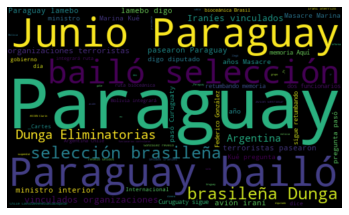

In [111]:
#Eliminar conectores y palabras inutiles
#Generar la nube de palabras
from stop_words import get_stop_words
palabras_irrelevantes = get_stop_words('spanish')
allWords = ' '.join([twts for twts in tweets_list['Tweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110, stopwords = palabras_irrelevantes).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

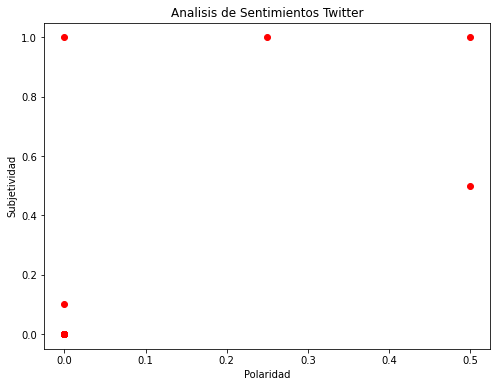

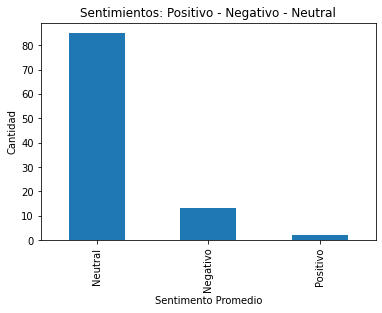

In [112]:
#Creacion de graficos

plt.figure(figsize=(8,6)) 

for i in range(0, tweets_list.shape[0]):
  plt.scatter(tweets_list['Polaridad'][i], tweets_list['Subjetividad'][i], color='Red') 
  
plt.title('Analisis de Sentimientos Twitter') 
plt.xlabel('Polaridad') 
plt.ylabel('Subjetividad') 
plt.show()

plt.title('Sentimientos: Positivo - Negativo - Neutral')
plt.xlabel('Sentimento Promedio')
plt.ylabel('Cantidad')
tweets_list['Sentimiento'].value_counts().plot(kind = 'bar')
plt.show()